In [2]:
# Set the seed value for the notebook so the results are reproducible
from numpy.random import seed
seed(1)

In [3]:
# Dependencies
import numpy as np
import pandas as pd

In [12]:
import tensorflow
tensorflow.keras.__version__
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

In [13]:
houses = pd.read_csv('Resources/home_data.csv')

cut_labels_20 = ['<125k', '125-150k', '150k-175k', '175k-200k', 
                 '200k-220k', '220k-240k', '240k-260k', '260k-280k', '280k-300k',
                 '300k-320k', '320k-340k', '340k-360k', '360k-380k', '380k-400k', 
                 '400k-420k', '420k-440k', '440k-460k', '460k-480k', '480k-500k', 
                 '500k+']
cut_bins = [0, 125000, 150000, 175000, 
            200000, 220000, 240000, 260000, 280000, 
            300000, 320000, 340000, 360000, 380000, 
            400000, 420000, 440000, 460000, 480000,
            500000, 10000000]


## Data Pre-Processing

In [23]:
# Add Price Range Labels
houses["price_range"] = pd.cut(houses['price'], bins=cut_bins, labels=cut_labels_20)

In [24]:
# Add Label Encoded the zipcode data
label_encoder = LabelEncoder()
label_encoder.fit(houses["zipcode"])
houses["labeled_zipcodes"] = label_encoder.transform(houses["zipcode"])

houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_range,labeled_zipcodes
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650.0,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,220k-240k,66
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242.0,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,500k+,55
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000.0,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,175k-200k,16
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000.0,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,500k+,58
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080.0,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,500k+,37


In [66]:

#X_trimmed = houses[["bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view","condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated","zipcode"]]
#X_trimmed = houses.drop(["id","date","price","zipcode","lat","long","sqft_living15","sqft_lot15","price_range"], axis=1)
X_trimmed = houses.drop(["id","date","price","waterfront","view","yr_renovated","zipcode","lat","long","sqft_living15","sqft_lot15","price_range"], axis=1)
X_trimmed = houses.drop(["id","date","price","waterfront","view","yr_renovated","zipcode","sqft_living15","sqft_lot15","price_range","labeled_zipcodes"], axis=1)


y_prices = houses["price"]
y_ranges = houses["price_range"]

In [67]:
X_trimmed

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,lat,long
0,3,1.00,1180,5650.0,1.0,3,7,1180,0,1955,47.5112,-122.257
1,3,2.25,2570,7242.0,2.0,3,7,2170,400,1951,47.7210,-122.319
2,2,1.00,770,10000.0,1.0,3,6,770,0,1933,47.7379,-122.233
3,4,3.00,1960,5000.0,1.0,5,7,1050,910,1965,47.5208,-122.393
4,3,2.00,1680,8080.0,1.0,3,8,1680,0,1987,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131.0,3.0,3,8,1530,0,2009,47.6993,-122.346
21609,4,2.50,2310,5813.0,2.0,3,8,2310,0,2014,47.5107,-122.362
21610,2,0.75,1020,1350.0,2.0,3,7,1020,0,2009,47.5944,-122.299
21611,3,2.50,1600,2388.0,2.0,3,8,1600,0,2004,47.5345,-122.069


In [34]:
X_trimmed["labeled_zipcodes"]

0        66
1        55
2        16
3        58
4        37
         ..
21608    42
21609    60
21610    59
21611    15
21612    59
Name: labeled_zipcodes, Length: 21613, dtype: int64

In [35]:
y_prices.describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [36]:
y_ranges.describe()

count     21613
unique       20
top       500k+
freq       9053
Name: price_range, dtype: object

<AxesSubplot:ylabel='Frequency'>

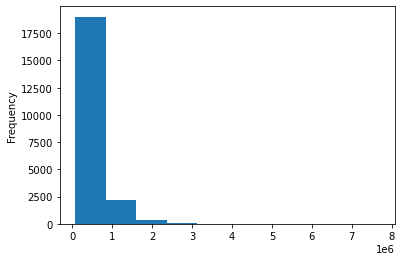

In [37]:
y_prices.plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

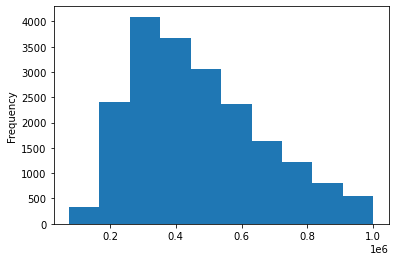

In [38]:
# Filter out expensive houses here if we want to 

affordable = houses[houses["price"] <= 1000000]["price"]
affordable.plot(kind="hist")

In [39]:
affordable.describe()

count      20148.000000
mean      467700.863510
std       196360.574702
min        75000.000000
25%       314000.000000
50%       434000.000000
75%       593600.250000
max      1000000.000000
Name: price, dtype: float64

In [ ]:
houses.shape

In [40]:
#X = houses.drop(["price", "date"], axis=1)
y = houses["price"].values.reshape(-1,1)
print(X_trimmed.shape, y.shape)


(21613, 11) (21613, 1)


In [41]:
X_trimmed.head(50)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,labeled_zipcodes
0,3,1.00,1180,5650.0,1.0,3,7,1180,0,1955,66
1,3,2.25,2570,7242.0,2.0,3,7,2170,400,1951,55
2,2,1.00,770,10000.0,1.0,3,6,770,0,1933,16
3,4,3.00,1960,5000.0,1.0,5,7,1050,910,1965,58
4,3,2.00,1680,8080.0,1.0,3,8,1680,0,1987,37
5,4,4.50,5420,101930.0,1.0,3,11,3890,1530,2001,29
6,3,2.25,1715,6819.0,2.0,3,7,1715,0,1995,2
7,3,1.50,1060,9711.0,1.0,3,7,1060,0,1963,68
8,3,1.00,1780,7470.0,1.0,3,7,1050,730,1960,60
9,3,2.50,1890,6560.0,2.0,3,7,1890,0,2003,23


In [42]:
y_prices = houses["price"]
y_prices.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [43]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model


In [ ]:
# We use this code only when we are trying to use binning of the y data
# Step 1: Label-encode data set
#label_encoder = LabelEncoder()
#label_encoder.fit(y_ranges)
#encoded_y_train = label_encoder.transform(y_train)
#encoded_y_test = label_encoder.transform(y_test)


In [ ]:
# We use this code only when we are trying to use binning of the y data
# Step 2: Convert encoded labels to one-hot-encoding
#y_train_categorical = to_categorical(encoded_y_train)
#y_test_categorical = to_categorical(encoded_y_test)
#y_train_categorical

In [45]:
# LabelEncode the zipcode data


In [68]:
X_train, X_test, y_train, y_test = train_test_split(
    X_trimmed, y_prices, random_state=42)

In [62]:
y_train

5945     268643.0
8423     245000.0
13488    200000.0
20731    352499.0
2358     232000.0
           ...   
11964    378000.0
21575    399950.0
5390     575000.0
860      245000.0
15795    315000.0
Name: price, Length: 16209, dtype: float64

In [63]:
y_test

735       365000.0
2830      865000.0
4106     1038000.0
16218    1490000.0
19964     711000.0
           ...    
11144     650000.0
17803     705000.0
268       272500.0
518      2250000.0
8482      330000.0
Name: price, Length: 5404, dtype: float64

In [65]:
y_test_pred

array([[ 458898.44],
       [ 741513.5 ],
       [1222316.8 ],
       ...,
       [ 535737.56],
       [1620891.8 ],
       [ 478444.84]], dtype=float32)

In [69]:
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create a Deep Learning Model

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score

In [73]:
# Create model and add layers
num_inputs = X_train_scaled[0].size
num_units = 3 * num_inputs

model = Sequential()
model.add(Dense(units=num_units, activation='relu', input_dim=num_inputs))
model.add(Dense(units=num_units, activation='relu'))
#model.add(Dense(units=20, activation='softmax'))  # Classification
model.add(Dense(units=1, activation='linear'))

In [74]:
# Compile and fit the model
#model.compile(optimizer='adam',
#              loss='categorical_crossentropy',
#              metrics=['accuracy'])

# Compile and fit the model
model.compile(optimizer='adam',
              loss='mean_squared_error'#,
              #metrics=['accuracy']
             )

In [75]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 36)                468       
_________________________________________________________________
dense_4 (Dense)              (None, 36)                1332      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 37        
Total params: 1,837
Trainable params: 1,837
Non-trainable params: 0
_________________________________________________________________


In [52]:
X_train_scaled

array([[ 0.67740215,  0.17896268, -0.2902756 , ..., -0.65784273,
        -0.34566343, -0.26941502],
       [-0.3941321 ,  0.50566682, -0.52181284, ..., -0.65784273,
         0.70977096, -0.842519  ],
       [ 0.67740215,  0.50566682, -0.38950585, ..., -0.65784273,
         0.7778635 , -1.72822514],
       ...,
       [-0.3941321 ,  0.50566682,  0.05151748, ..., -0.65784273,
         1.11832621, -0.32151538],
       [-2.53720059, -1.78126215, -1.86693398, ..., -0.65784273,
        -0.27757089,  1.50199726],
       [ 0.67740215,  0.50566682,  1.16510137, ..., -0.65784273,
         1.18641875, -0.47781647]])

In [ ]:
model.fit(
    #X_train_scaled,
    #y_train_categorical,
    X_train_scaled,
    y_train,
    epochs=120,
    shuffle=True,
    verbose=2
)

Train on 16209 samples
Epoch 1/120
16209/16209 - 1s - loss: 35320121874.0364
Epoch 2/120
16209/16209 - 1s - loss: 35318274566.1595
Epoch 3/120
16209/16209 - 1s - loss: 35319047275.0813
Epoch 4/120
16209/16209 - 1s - loss: 35305671434.8819
Epoch 5/120
16209/16209 - 1s - loss: 35294263593.3005
Epoch 6/120
16209/16209 - 1s - loss: 35296666271.5479
Epoch 7/120
16209/16209 - 1s - loss: 35285350680.1170
Epoch 8/120
16209/16209 - 1s - loss: 35286025621.5189
Epoch 9/120
16209/16209 - 1s - loss: 35274284461.0831
Epoch 10/120
16209/16209 - 1s - loss: 35271145713.0750
Epoch 11/120
16209/16209 - 1s - loss: 35264272649.4604
Epoch 12/120
16209/16209 - 1s - loss: 35248505944.5079
Epoch 13/120
16209/16209 - 1s - loss: 35246509571.6957
Epoch 14/120
16209/16209 - 1s - loss: 35244653318.3964
Epoch 15/120
16209/16209 - 1s - loss: 35228824620.9173
Epoch 16/120
16209/16209 - 1s - loss: 35227139406.6368
Epoch 17/120
16209/16209 - 1s - loss: 35216242018.0315
Epoch 18/120
16209/16209 - 1s - loss: 35204760285.2

In [80]:
model.save("Trained_Models/chris_housing_trained_linear_coords_3x3x420.h5")

In [ ]:
model = load_model("Trained_Models/chris_housing_trained_v1.h5")

## Quantify our Trained Model

In [82]:
#model_loss, model_accuracy = model.evaluate(
#    X_test, y_test_categorical, verbose=2)

#model_loss, model_accuracy = model.evaluate(
#    X_test_scaled, y_test, verbose=2)

y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

train_value = r2_score(y_train, y_train_pred)
test_value = r2_score(y_test, y_test_pred)

#print(
#    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

print(train_value)
print(test_value)

0.728084274148523
0.726827690878904


In [57]:
y_test_pred

array([[ 482900.16],
       [ 765626.44],
       [1170769.4 ],
       ...,
       [ 528996.44],
       [1537899.1 ],
       [ 393277.56]], dtype=float32)

## Make Predictions

In [60]:
encoded_predictions = model.predict_classes(X_test[:100])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)
prediction_labels

NotFittedError: This LabelEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
encoded_predictions = model.predict_classes(X_test)
prediction_labels = label_encoder.inverse_transform(encoded_predictions)
prediction_labels

In [ ]:
print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {list(y_test_categorical[:20])}")

In [ ]:
to_categorical y_test_categorical[:20]

In [ ]:
label_encoder.inverse_transform(y_test_categorical[:20])